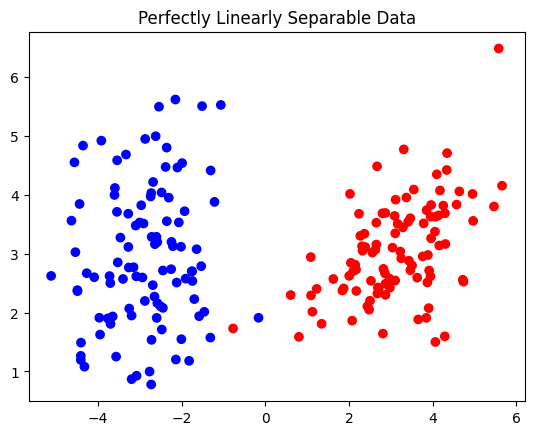

In [15]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import seed
seed(42)
X, y = make_classification(
    n_samples=200,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    class_sep=3.0,      # VERY IMPORTANT
    flip_y=0,           # no noise
    random_state=42
)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap="bwr")
plt.title("Perfectly Linearly Separable Data")
plt.show()


In [47]:
# logisticRegression using sgd

class LogisticRegressionSGD:

    def __init__(self, lr=0.01, epoches=10):
        self.lr = lr
        self.epoches = epoches
        self.coef_ = None
        self.intercept_ = None

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        # add bias term
        X = np.insert(X, 0, 1, axis=1)
        weights = np.zeros(X.shape[1])

        n = X.shape[0]

        for _ in range(self.epoches):
            for _ in range(n):
                r = np.random.randint(0, n)
                z = X[r] @ weights
                y_pred = self._sigmoid(z)
                error = y[r] - y_pred
                gradient = error * X[r]          # SGD gradient
                weights = weights + self.lr * gradient

        self.intercept_ = weights[0]
        self.coef_ = weights[1:]

    def predict(self, X):
        preds = []
        for x in X:
            z = x @ self.coef_ + self.intercept_
            p_hat = self._sigmoid(z)
            preds.append(1 if p_hat >= 0.5 else 0)
        return np.array(preds)


In [48]:
my_lr   = LogisticRegressionSGD()
my_lr.fit(X,y)
y_mypred = my_lr.predict(X)

In [49]:
from sklearn.metrics import accuracy_score
accuracy_score(y , y_mypred)

0.995

In [50]:
y_mypred

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0])

In [70]:
# let's try out for multiple features 
X, y = make_classification(
    n_samples=200,
    n_features=13,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    class_sep=3.0,      # VERY IMPORTANT
    flip_y=0,           # no noise
    random_state=42
)


In [71]:
my_lr   = LogisticRegressionSGD()
my_lr.fit(X,y)
y_mypred = my_lr.predict(X)

In [72]:
accuracy_score(y , y_mypred)

0.995

In [79]:
import pandas as pd 
X_df = pd.DataFrame(X)
y_series = pd.Series(y, name="target")

df = pd.concat([X_df, y_series], axis=1)


In [80]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,target
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,-0.005892,0.067645,0.127291,0.179445,0.052584,-0.111361,0.197850,-0.106625,-0.056634,0.135910,-0.003501,0.043978,2.998048,0.500000
std,0.963781,1.057935,3.182641,1.079960,0.996813,0.955554,0.952186,0.986730,0.943766,0.974528,0.991524,0.974747,1.029297,0.501255
min,-2.562334,-2.438817,-5.121909,-3.019512,-2.872262,-2.604214,-2.921350,-2.696887,-2.635748,-2.940389,-2.896255,-2.848543,0.778002,0.000000
25%,-0.654854,-0.643776,-2.728096,-0.599808,-0.587257,-0.737265,-0.410062,-0.772345,-0.716635,-0.505376,-0.654226,-0.625005,2.353238,0.000000
50%,-0.022505,0.126275,-0.465923,0.247246,0.039433,-0.096187,0.080232,-0.143118,-0.043633,0.125057,0.039972,-0.012390,2.866166,0.500000
75%,0.618373,0.783694,3.107184,0.955183,0.631304,0.549506,0.929800,0.585973,0.543314,0.743465,0.667878,0.736043,3.679383,1.000000
max,3.109919,3.193108,5.663322,2.759660,3.137749,2.560085,2.632382,2.412615,2.493000,2.985259,2.601683,3.078881,6.484226,1.000000
